In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import h3
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from src.settings import *
from shapely.geometry import Polygon
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from src.tools.osmnx_utils import get_place_dir_name
from src.tools.h3_utils import get_resolution_buffered_suffix
from pathlib import Path
import plotly.express as px
from src.tools.clustering import cluster_hdbscan
from src.models.tfidf import tfidf
from src.tools.dim_reduction import reduce_umap
import matplotlib.pyplot as plt
import contextily as ctx
from keplergl import KeplerGl
from src.tools.aggregation import aggregate_hex
import torch
from torch import nnG
import torch.nn.functional as F
import pytorch_lightning as pl
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset
from pytorch_lightning.loggers import WandbLogger
import wandb
from src.models.autoencoder import LitAutoEncoder
import networkx as nx
import osmnx as ox

tqdm.pandas()

In [4]:
place_name = "Wrocław,Poland"
place_dir_name = get_place_dir_name(place_name)
resolution = 9
buffered = True

hexagons = gpd.read_file(GENERATED_DATA_DIR.joinpath(place_dir_name, f"hex_{get_resolution_buffered_suffix(resolution, buffered)}.geojson"), driver="GeoJSON").set_index("h3_id")
G = ox.load_graphml(GENERATED_DATA_DIR.joinpath(place_dir_name, "graph_drive.graphml"))

In [19]:
ox.save_graphml(G, GENERATED_DATA_DIR.joinpath(place_dir_name, "graph_drive_gephi.graphml"), gephi=True)

In [18]:
G.edges(data=True)

OutMultiEdgeDataView([(95584835, 297779709, {'osmid': [24707867, 656793686], 'oneway': True, 'lanes': '2', 'name': 'Bardzka', 'highway': 'tertiary', 'maxspeed': '50', 'length': 178.45, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000027043196250>}), (95584835, 241778108, {'osmid': [656794402, 28458110], 'oneway': True, 'lanes': '2', 'ref': '94', 'name': 'Aleja Armii Krajowej', 'highway': 'primary', 'maxspeed': '50', 'length': 28.881999999999998, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000027040E3CAC0>}), (95584841, 164895026, {'osmid': 27665976, 'name': 'Biskupa Bernarda Bogedaina', 'highway': 'unclassified', 'oneway': False, 'length': 14.714}), (95584841, 268480775, {'osmid': 304583916, 'oneway': True, 'lanes': '2', 'ref': '94', 'name': 'Aleja Armii Krajowej', 'highway': 'primary', 'maxspeed': '50', 'length': 125.913, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000027040E3C820>}), (95584850, 95584855, {'osmid': 28458082

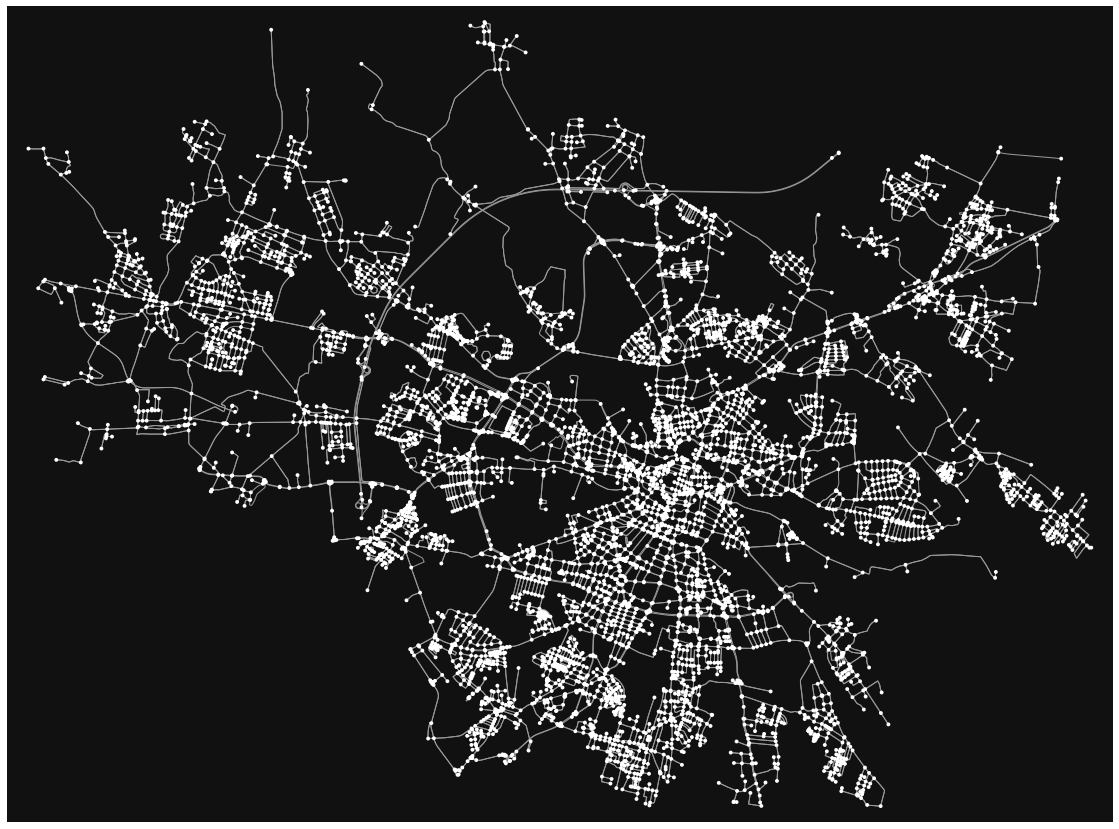

(<Figure size 1440x1080 with 1 Axes>, <AxesSubplot:>)

In [16]:
ax = ox.plot_graph(G, figsize=(20, 15))
ax